# Importando bibliotecas

In [1]:
# Bibliotecas para tratar os dados
import pandas as pd
import numpy as np

# Bibliotecas para EDA
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt 

# Biblioteca para manipular diferentes partes do ambiente de tempo de execução do Python
import sys

# Biblioteca para manipular o sistema operacional
import os

# Adicionando o caminho na variavel ambiente de todas as coisas que são refatoradas
sys.path.append(os.getenv('PATH_SRC'))

# Bibliotecas para contrução do modelo
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.preprocessing import TargetEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import root_mean_squared_error
import optuna


# Configurando para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

# Importando funções criadas
import config, custom_funcs

c:\Users\dafne.piovesan\.conda\envs\projeto1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Importando o dataset

In [2]:
#importando dataset de treino
data_train = pd.read_csv(config.house_prices_train)
data_train.shape

(1460, 81)

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#importando dataset de teste
data_test = pd.read_csv(config.house_prices_test)
data_test.shape

(1459, 80)

In [5]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#importando a target do dataset de teste
target_test = pd.read_csv(config.target)
target_test.shape

(1459, 2)

In [7]:
target_test.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Feature Engineering

In [8]:
data = data_train.copy()

In [9]:
print(f'O dataset possui {data.shape[0]} linhas')

O dataset possui 1460 linhas


In [10]:
# Selecionando as colunas que se enquadram em valores continuos (mais de 20 valores unicos)
data.columns[data.nunique() > 20]

Index(['Id', 'LotFrontage', 'LotArea', 'Neighborhood', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'],
      dtype='object')

LotFrontage 191.47371724044268


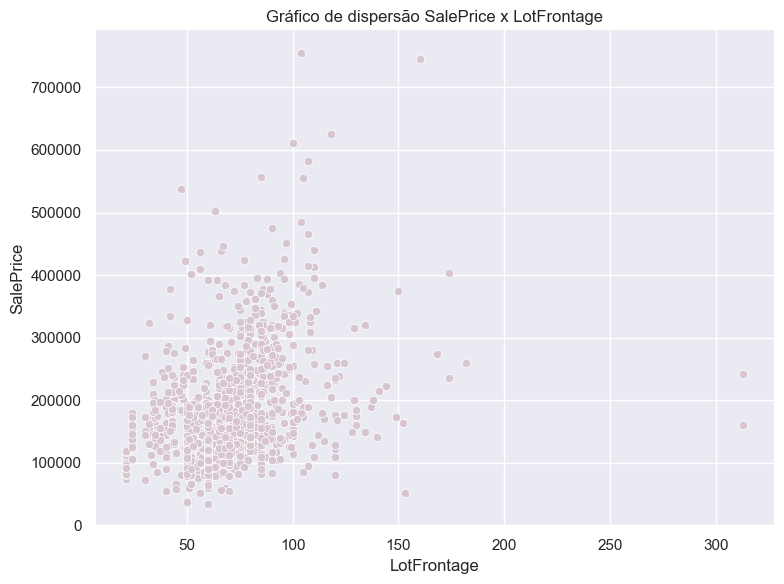

LotArea 60423.15274408753


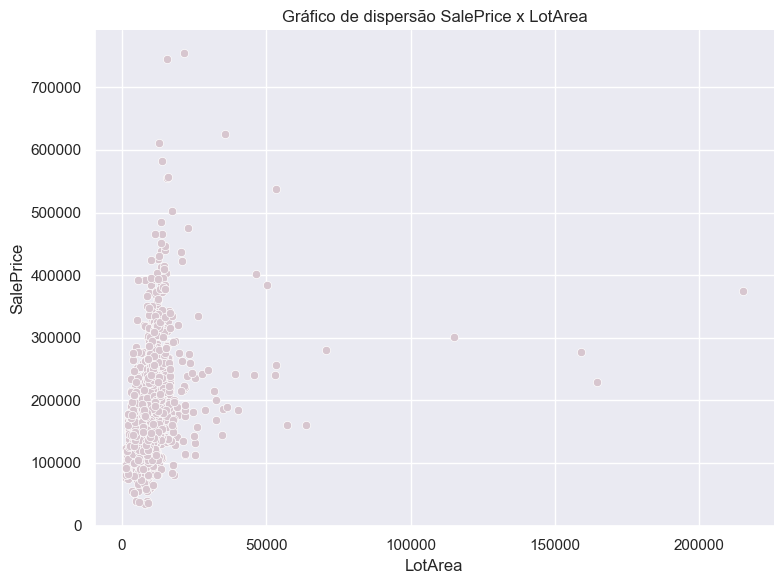

MasVnrArea 1009.016294644072


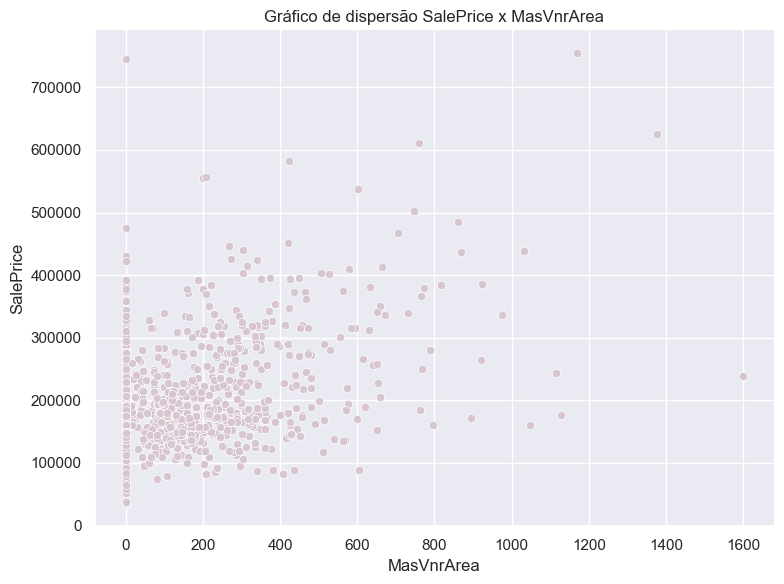

BsmtFinSF1 2724.130180232036


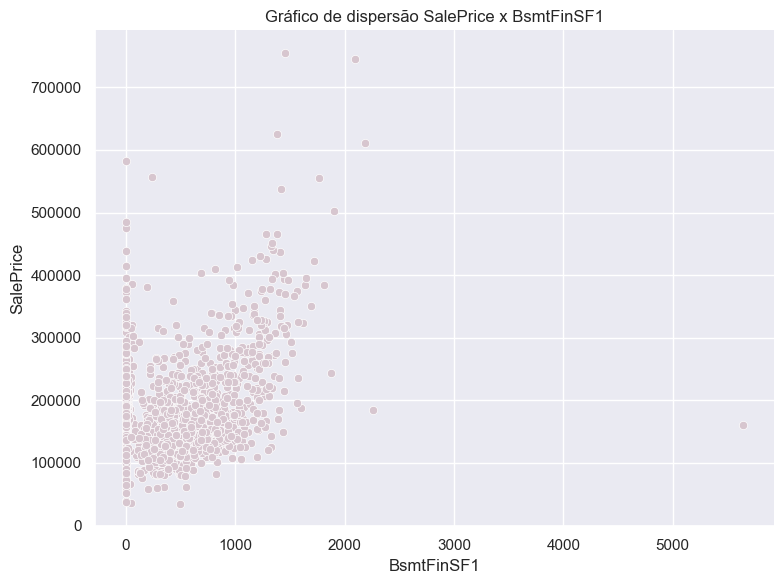

BsmtFinSF2 853.1456791012017


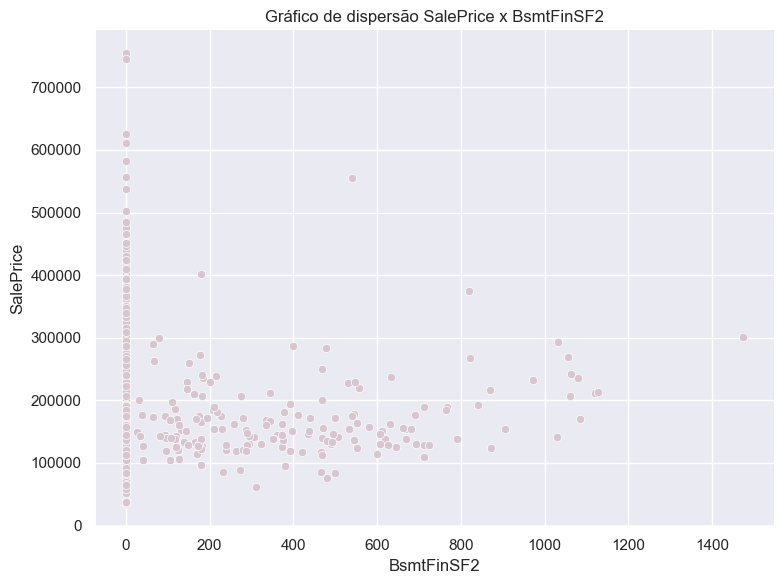

TotalBsmtSF 3250.956074352148


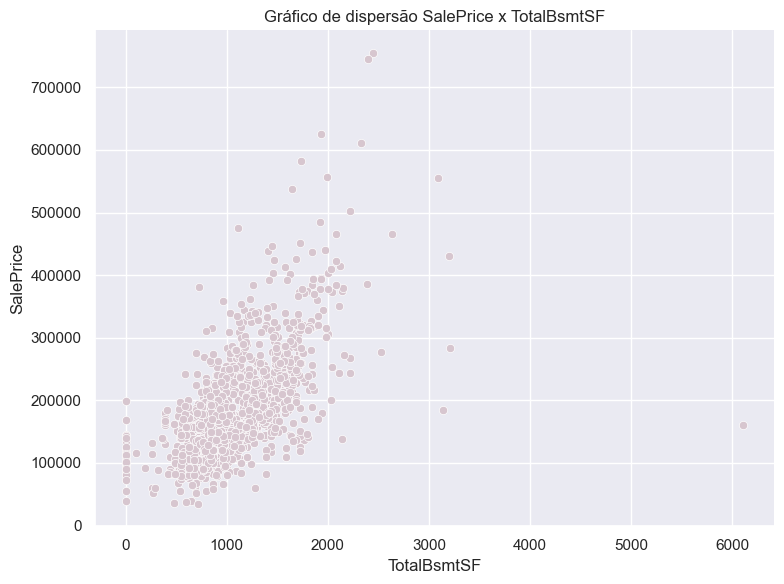

1stFlrSF 3095.565402534139


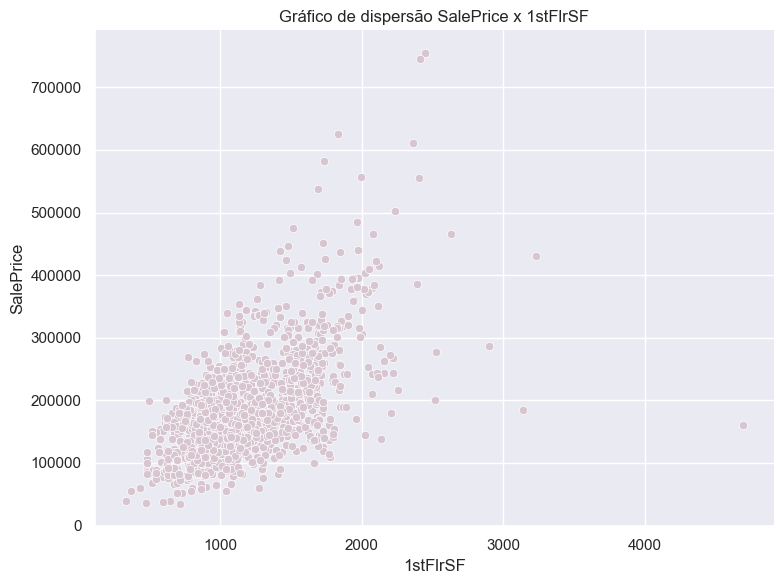

LowQualFinSF 248.95992771554614


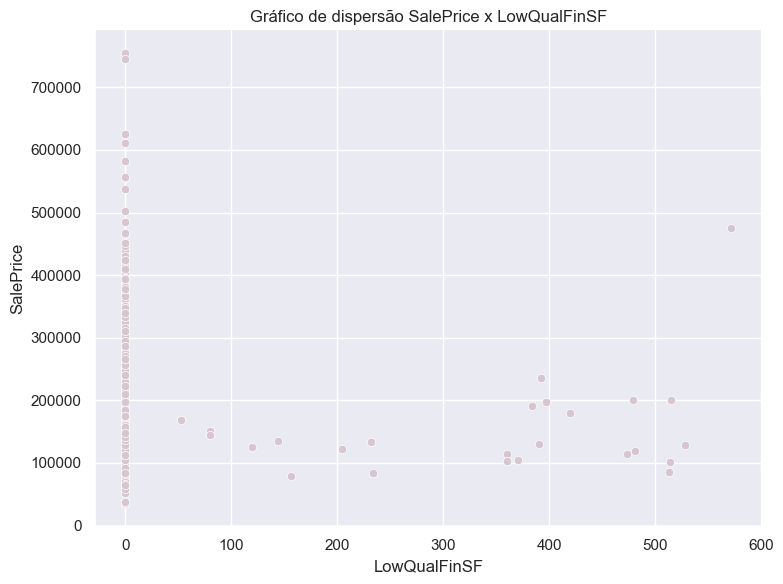

GrLivArea 4142.86561574615


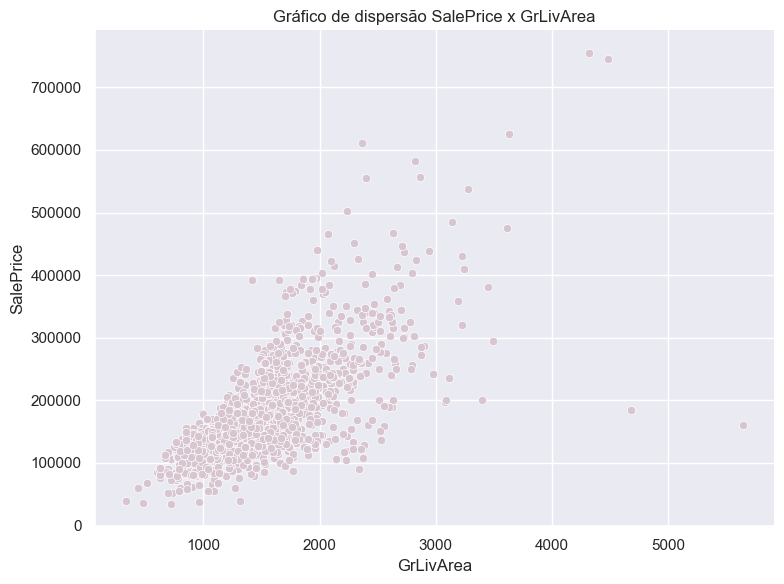

WoodDeckSF 720.9384923065656


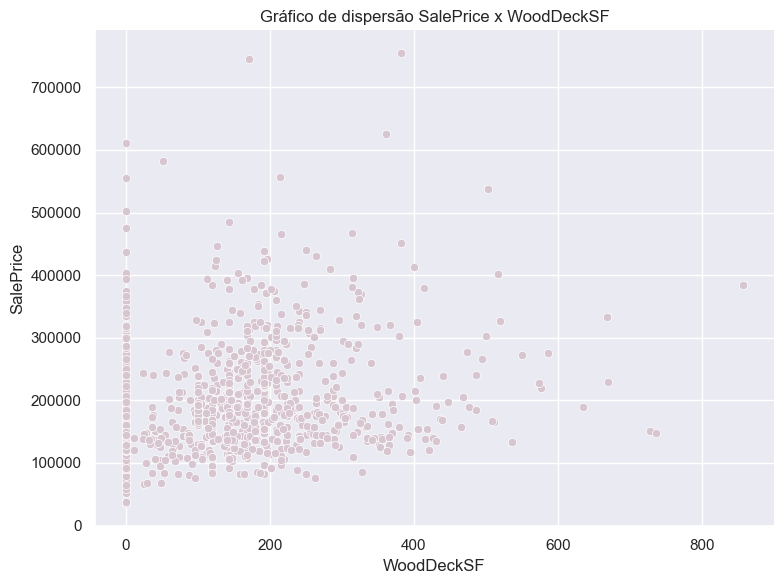

OpenPorchSF 377.94041235585127


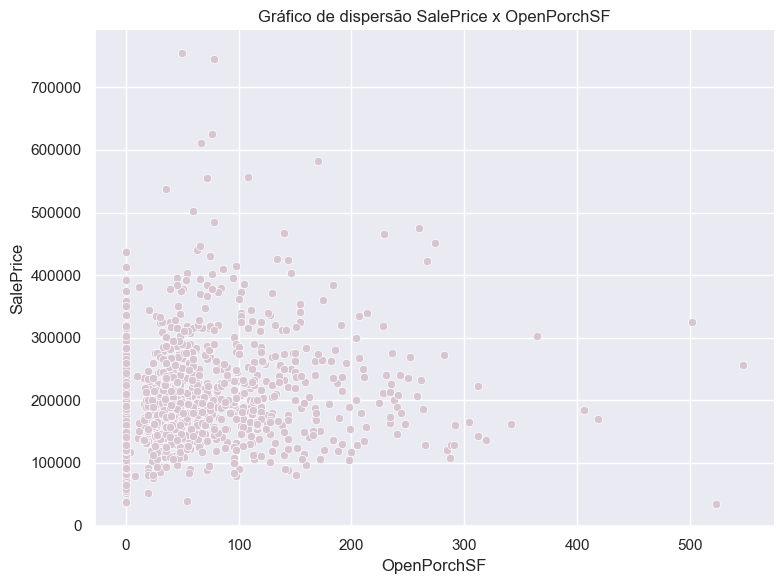

EnclosedPorch 327.5498525976841


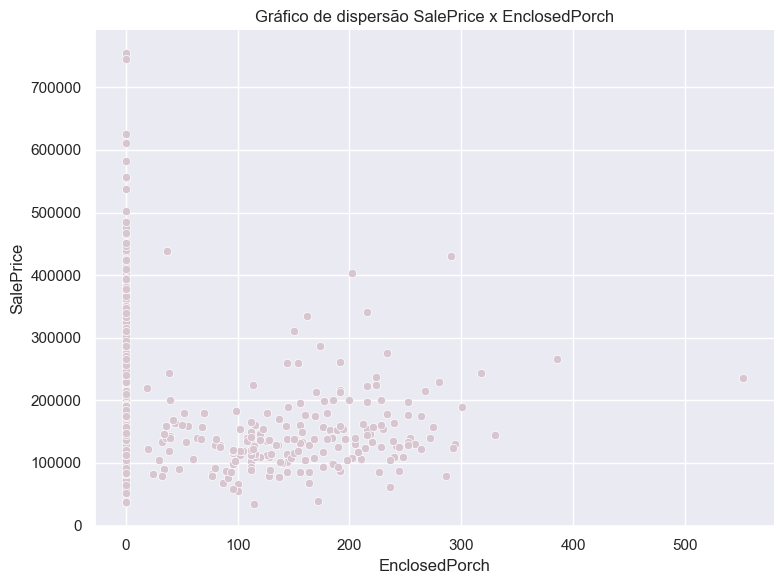

ScreenPorch 293.84803531348047


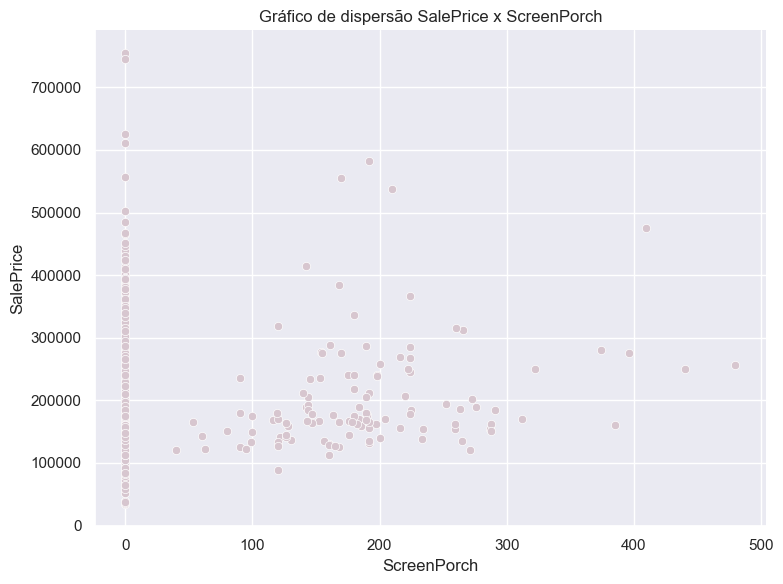

MiscVal 2524.104163385611


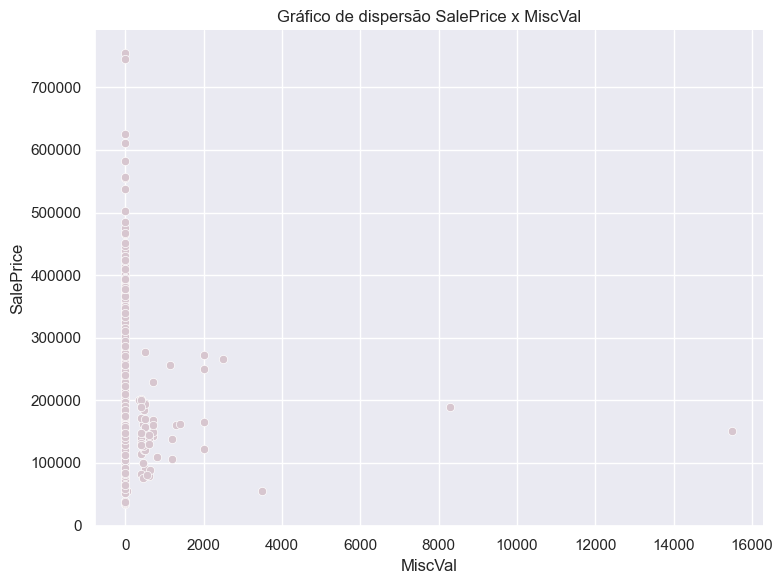

In [11]:
#retirando Neighborhood que é uma coluna categorica, mas possui mais de 20 categorias, e também as que são relacionadas a ano
cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', \
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', \
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal']

#vendo como os dados dessas features estão dispersos em relação ao preço de venda
for feat in cols:
    media = data[feat].mean()
    desvio_padrao = data[feat].std()
    limite_superior = media + 5 * desvio_padrao

    if len(data[data[feat] > limite_superior]) > 0:
        print(feat, limite_superior)
        custom_funcs.grafico_dispersao(data, feat, 'SalePrice')

In [12]:
# Removendo alguns outliers que estão muito distantes do conjunto de dados
data.drop(data[data['LotFrontage'] > 300].index, inplace=True)
data.drop(data[data['LotArea'] > 100000].index, inplace=True)
data.drop(data[data['MasVnrArea'] > 1160].index, inplace=True)
data.drop(data[data['BsmtFinSF1'] > 5000].index, inplace=True)
data.drop(data[data['BsmtFinSF2'] > 1400].index, inplace=True)
data.drop(data[data['TotalBsmtSF'] > 6000].index, inplace=True)
data.drop(data[data['1stFlrSF'] > 4000].index, inplace=True)
data.drop(data[data['GrLivArea'] > 4600].index, inplace=True)
data.drop(data[data['OpenPorchSF'] > 500].index, inplace=True)
data.drop(data[data['EnclosedPorch'] > 500].index, inplace=True)
data.drop(data[data['MiscVal'] > 14000].index, inplace=True)

print(f'Após a retirada, o dataset possui {data.shape[0]} linhas')

Após a retirada, o dataset possui 1444 linhas


In [13]:
#Remover uma das features que são altamente correlacionadas com outra feature (observadas na EDA)
data = data.drop(columns = ['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', 'TotalBsmtSF'])

In [14]:
#Juntando valores correspondentes a área de diferentes varandas (porch) em uma feature apenas
data['Porch'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
data.drop(columns = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace= True)

data_test['Porch'] = data_test['OpenPorchSF'] + data_test['EnclosedPorch'] + data_test['3SsnPorch'] + data_test['ScreenPorch']
data_test.drop(columns = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace= True)

In [15]:
#Juntando valores correspondentes a quantidade de banheiros (bath) em uma feature apenas
data['Bath'] = data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']) + data['FullBath'] + (0.5 * data['HalfBath'])
data.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace= True)

data_test['Bath'] = data_test['BsmtFullBath'] + (0.5 * data_test['BsmtHalfBath']) + data_test['FullBath'] + (0.5 * data_test['HalfBath'])
data_test.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace= True)

In [16]:
X = data.drop(columns=['Id','SalePrice'])
y = data['SalePrice']

In [17]:
#removendo colunas que tenham mais de 95% dos dados em 1 categoria
for col_cat in X.select_dtypes(exclude=[np.number]).columns.tolist():
    for cats in X[col_cat].unique():
        qtde_cat = X[X[col_cat] == cats].shape[0]
        total = X.shape[0]

        if (qtde_cat/total) > 0.95:
            X.drop(columns=col_cat, inplace=True)
            break

In [18]:
print(f'Após as remoções, o dataset possui {X.shape[1]} colunas')

Após as remoções, o dataset possui 64 colunas


In [19]:
X.isnull().sum().sort_values(ascending=0).head(15)

PoolQC          1439
MiscFeature     1394
Alley           1355
Fence           1167
MasVnrType       864
FireplaceQu      688
LotFrontage      255
GarageType        80
GarageFinish      80
GarageCond        80
GarageQual        80
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
dtype: int64

In [20]:
print('Valores únicos para PoolArea, quando PoolQC é nulo:')
print(X[X['PoolQC'].isnull()]['PoolArea'].unique())
#pode tratar com ND, significa que não tem piscina

print('\nValores únicos para Alley:')
print(X['Alley'].unique())
#pode tratar com ND (seria o equivalente a 'No alley access')

print('\nValores únicos para MiscFeature:')
print(X['MiscFeature'].unique())
#pode tratar com ND, (seria o equivalente a 'None')

print('\nValores únicos para MasVnrType:')
print(X['MasVnrType'].unique())
#pode tratar com ND, (seria o equivalente a 'None')

print('\nValores únicos para Fence:')
print(X['Fence'].unique())
#pode tratar com ND, (seria o equivalente a 'No Fence')

print('\nValores únicos para Fireplaces, quando FireplaceQu é nulo:')
print(X[X['FireplaceQu'].isnull()]['Fireplaces'].unique())
#pode tratar com ND, (seria o equivalente a 'No Fireplace')

print('\nValores únicos para GarageArea, quando GarageQual ou GarageCond ou GarageFinish ou GarageType são nulos:')
print(X[X['GarageQual'].isnull()]['GarageArea'].unique())
print(X[X['GarageCond'].isnull()]['GarageArea'].unique())
print(X[X['GarageFinish'].isnull()]['GarageArea'].unique())
print(X[X['GarageType'].isnull()]['GarageArea'].unique())
#pode tratar com ND, (seria o equivalente a 'No Garage')

Valores únicos para PoolArea, quando PoolQC é nulo:
[0]

Valores únicos para Alley:
[nan 'Grvl' 'Pave']

Valores únicos para MiscFeature:
[nan 'Shed' 'Othr' 'Gar2' 'TenC']

Valores únicos para MasVnrType:
['BrkFace' nan 'Stone' 'BrkCmn']

Valores únicos para Fence:
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

Valores únicos para Fireplaces, quando FireplaceQu é nulo:
[0]

Valores únicos para GarageArea, quando GarageQual ou GarageCond ou GarageFinish ou GarageType são nulos:
[0]
[0]
[0]
[0]


In [21]:
y = np.log(y)

In [22]:
numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = X.select_dtypes(exclude=[np.number])

#selecionando features categóricas que possuem uma ordem hierarquica
columns = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'FireplaceQu', \
    'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'PoolQC', 'Fence']

categorical_columns1 = categorical_columns[columns].columns.tolist()
categorical_columns2 = categorical_columns.drop(columns = columns).columns.tolist()

In [23]:
#criando um dicionário com uma ordem crescente de algumas categorias para a utilização do ordinal encoder
ordem_categorias = {
    'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['ND', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['ND', 'Po', 'Fa', 'TA', 'Gd'],
    'PoolQC': ['ND', 'Fa', 'Gd', 'Ex'],
    'FireplaceQu': ['ND', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQual': ['ND', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['ND', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['ND', 'No', 'Mn', 'Av', 'Gd'], 
    'BsmtFinType1': ['ND', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['ND', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'Fence': ['ND', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
encoders = [
    OneHotEncoder(drop='first', handle_unknown = 'ignore'),
    TargetEncoder(random_state = 42)    
]

preprocessor_list = []

for encoder in encoders:

    numerical_transform = Pipeline(steps=[
        ("imputer_num", SimpleImputer(strategy='median')),
        ]
    )

    categorical_transform1 = Pipeline(steps=[
            ("imputer_cat1", SimpleImputer(strategy='constant', fill_value='ND')),
            ("encoder1", custom_funcs.CustomOrdinalEncoder(categories_dict = ordem_categorias, columns = columns))
        ]
    )
    
    categorical_transform2 = Pipeline(steps=[
            ("imputer_cat2", SimpleImputer(strategy='constant', fill_value='ND')),
            ("encoder2", encoder)
        ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numerical_transform, numerical_columns),
            ("cat1", categorical_transform1, categorical_columns1),
            ("cat2", categorical_transform2, categorical_columns2)
        ]
    )

    preprocessor_list.append(preprocessor)

Foram escolhidos 3 modelos para prever o preço das casas com base nas features selecionadas.
- Primeiro, a Regressão Linear quantifica a relação entre uma ou mais variáveis ​​preditoras e uma variável alvo, minimizando a soma residual dos quadrados entre os valores reais e os valores previstos pela aproximação linear. Como algumas das nossas features possuem uma relação linear com a target, foi selecionado esse algoritmo para teste. Algumas desvantagens é que é limitada a relacionamento lineares, pressupondo que existe uma relação direta entre variáveis ​​dependentes e independentes; E os dados devem ser independentes, ou seja, os valores de um registro não tem relação com o de outro registro. Já as vantagens, é um modelo simples de implementação, de fácil interpretação.
- Em segundo foi o Random Forest, que cria de forma aleatória várias Árvores de Decisão (Decision Trees) e combina o resultado de todas elas para chegar no resultado final. Uma desvantagem desse algoritmo é que com variáveis ​​categóricas com um número diferente de níveis, as florestas aleatórias são tendenciosas em favor dos atributos com mais níveis. 
- Em terceiro foi o LightGBM, que é similar ao XGBoost, com um treinamento mais rápido, mantendo a performance. 

In [30]:
models_dict = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'LGBM': LGBMRegressor(random_state=42, verbose = -100)
}   

results = []

for encoder, preprocessor in zip(encoders, preprocessor_list):
    for label, model in models_dict.items():

        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("selector", VarianceThreshold()),
            ("classifier", model)
        ])

        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        metrics = - cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring = 'neg_root_mean_squared_error')

        print(f'{label} / {encoder} : {metrics}')

        rmse = metrics.mean()

        results.append((encoder, label, rmse))


results_df = pd.DataFrame(results, columns=['encoder', 'model', 'rmse'])

results_df.sort_values('rmse', ascending=True)

LinearRegression / OneHotEncoder(drop='first', handle_unknown='ignore') : [0.11324391 0.13440994 0.11735717 0.10687865 0.13444131]
RandomForest / OneHotEncoder(drop='first', handle_unknown='ignore') : [0.14204217 0.14898765 0.15092425 0.13828383 0.14390152]
LGBM / OneHotEncoder(drop='first', handle_unknown='ignore') : [0.13224132 0.1332289  0.14178136 0.1302687  0.13571964]
LinearRegression / TargetEncoder(random_state=42) : [0.12066709 0.11352063 0.10405242 0.10942891 0.12777122]
RandomForest / TargetEncoder(random_state=42) : [0.13714719 0.14465648 0.1558822  0.13843881 0.14146444]
LGBM / TargetEncoder(random_state=42) : [0.12841846 0.13328904 0.14322216 0.12525136 0.14078888]


,encoder,model,rmse
3,TargetEncoder(random_state=42),LinearRegression,0.115088
0,"OneHotEncoder(drop='first', handle_unknown='ig...",LinearRegression,0.121266
5,TargetEncoder(random_state=42),LGBM,0.134194
2,"OneHotEncoder(drop='first', handle_unknown='ig...",LGBM,0.134648
4,TargetEncoder(random_state=42),RandomForest,0.143518
1,"OneHotEncoder(drop='first', handle_unknown='ig...",RandomForest,0.144828


# Model

In [27]:
def objectiveLGBM(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.01)
    num_leaves = trial.suggest_int('num_leaves', 10, 100)
    min_data_in_leaf = trial.suggest_int('bagging_freq', 10, 200)
    max_depth = trial.suggest_int('max_depth', 15, 100)
    threshold = trial.suggest_float('threshold', 0, 0.3)
    k = trial.suggest_int('k', 10, 65)

    model = Pipeline(steps=[
            ("preprocessor", preprocessor_list[1]),
            ("selector1", VarianceThreshold(threshold = threshold)),
            ("selector2", SelectKBest(f_regression, k=k)),
            ("classifier", LGBMRegressor(learning_rate = learning_rate,
                        num_leaves = num_leaves,
                        min_data_in_leaf = min_data_in_leaf,
                        max_depth = max_depth,
                        n_jobs = -1,
                        random_state = 42, 
                        verbose = -100))
        ]
    )
    
    kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    metrics = - cross_val_score(model, X_test, y_test, cv = kfold, scoring = 'neg_root_mean_squared_error')

    rmse = metrics.mean()

    return rmse

In [28]:
studyLGBM = optuna.create_study(direction='minimize')

[I 2024-02-05 11:05:13,592] A new study created in memory with name: no-name-7cb01268-81f3-47b5-877d-012d7260767d


In [29]:
studyLGBM.optimize(objectiveLGBM, n_trials=100)

[I 2024-02-05 11:05:14,089] Trial 0 finished with value: 0.3158725696274123 and parameters: {'learning_rate': 0.005233202408214994, 'num_leaves': 100, 'bagging_freq': 113, 'max_depth': 99, 'threshold': 0.004995433808027816, 'k': 64}. Best is trial 0 with value: 0.3158725696274123.
[I 2024-02-05 11:05:14,504] Trial 1 finished with value: 0.25051422011610713 and parameters: {'learning_rate': 0.007965371462940067, 'num_leaves': 98, 'bagging_freq': 43, 'max_depth': 37, 'threshold': 0.007418939560336002, 'k': 27}. Best is trial 1 with value: 0.25051422011610713.
[I 2024-02-05 11:05:14,900] Trial 2 finished with value: 0.2811112136529813 and parameters: {'learning_rate': 0.009016261626107119, 'num_leaves': 30, 'bagging_freq': 93, 'max_depth': 90, 'threshold': 0.2547618417656017, 'k': 36}. Best is trial 1 with value: 0.25051422011610713.
[I 2024-02-05 11:05:15,277] Trial 3 finished with value: 0.37938288004286363 and parameters: {'learning_rate': 0.004411958971974798, 'num_leaves': 96, 'baggi

In [30]:
def objectiveLR(trial):
    threshold = trial.suggest_float('threshold', 0, 0.3)
    k = trial.suggest_int('k', 10, 65)

    model = Pipeline(steps=[
            ("preprocessor", preprocessor_list[1]),
            ("selector1", VarianceThreshold(threshold = threshold)),
            ("selector2", SelectKBest(f_regression, k=k)),
            ("classifier", LinearRegression())
        ]
    )
    
    kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    metrics = - cross_val_score(model, X_test, y_test, cv = kfold, scoring = 'neg_root_mean_squared_error')

    rmse = metrics.mean()

    return rmse

In [31]:
studyLR = optuna.create_study(direction='minimize')

[I 2024-02-05 11:06:03,419] A new study created in memory with name: no-name-3a7783b6-dd36-4507-a228-b6fefc0af430


In [32]:
studyLR.optimize(objectiveLR, n_trials=100)

[I 2024-02-05 11:06:03,896] Trial 0 finished with value: 0.12618570368632395 and parameters: {'threshold': 0.21942305929538652, 'k': 37}. Best is trial 0 with value: 0.12618570368632395.
[I 2024-02-05 11:06:04,183] Trial 1 finished with value: 0.13126828164515386 and parameters: {'threshold': 0.09809412215095033, 'k': 20}. Best is trial 0 with value: 0.12618570368632395.
[I 2024-02-05 11:06:04,612] Trial 2 finished with value: 0.12728640385707518 and parameters: {'threshold': 0.03629818066886822, 'k': 51}. Best is trial 0 with value: 0.12618570368632395.
[I 2024-02-05 11:06:04,916] Trial 3 finished with value: 0.12270898072894003 and parameters: {'threshold': 0.021622767826099665, 'k': 48}. Best is trial 3 with value: 0.12270898072894003.
[I 2024-02-05 11:06:05,242] Trial 4 finished with value: 0.1269802640830958 and parameters: {'threshold': 0.04650902703939356, 'k': 43}. Best is trial 3 with value: 0.12270898072894003.
[I 2024-02-05 11:06:05,687] Trial 5 finished with value: 0.131268

In [33]:
studyLR.best_params

{'threshold': 0.006682372467075854, 'k': 46}

In [34]:
best_params = studyLR.best_params

best_threshold = best_params['threshold']
best_k = best_params['k']

In [35]:
model = Pipeline(steps=[
            ("preprocessor", preprocessor_list[1]),
            ("selector1", VarianceThreshold()),
            ("selector2", SelectKBest(f_regression, k=best_k)),
            ("classifier", LinearRegression())
            #  LGBMRegressor(
            #             random_state = 42,
            #             n_jobs = -1,
            #             verbose = -100))
        ]
    )
    
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
metrics = - cross_val_score(model, X_test, y_test, cv = kfold, scoring = 'neg_root_mean_squared_error')

rmse = metrics.mean()
print(rmse)

0.12392712896485039


In [36]:
best_model = LinearRegression()
#LGBMRegressor(random_state = 42, n_jobs = -1,verbose = -100)

In [37]:
best_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("selector1", VarianceThreshold(threshold=best_threshold)),
        ("selector2", SelectKBest(f_regression, k=best_k)),
        ("classifier", best_model)
])

best_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BedroomAbvGr',
                                                   'Kit...
                                                   'Exterior2nd', 'MasVnrType',
                                                   'Foundation', 'CentralAir',
                                                   'Electrical', 'Functional',
                                                   'GarageType', 'GarageFinish',
                                                   'PavedDrive', 'MiscFeature',
                                                   'SaleType',
                                                   'SaleCondition'])])),
                ('selector1',
                 VarianceThreshold(threshold=0.006682372467075854)),
                ('selector2',
                 SelectKBest(k=46,
                             score_func=<function f_regression at 0x000001E7AB3D1D00>)),
                ('classifier', LinearRegression())])

In [38]:
test_final = data_test.copy()

In [39]:
data_test_ID = data_test['Id']

test_final.drop(columns='Id', inplace=True)

In [40]:
y_pred = best_pipeline.predict(test_final)

In [41]:
y_pred_escalareal = np.exp(y_pred)

In [42]:
target_test['Predict_SalePrice'] = y_pred_escalareal

In [43]:
target_test

,Id,SalePrice,Predict_SalePrice
0,1461,169277.052498,110934.355354
1,1462,187758.393989,159598.836237
2,1463,183583.683570,176935.032375
3,1464,179317.477511,193856.761848
4,1465,150730.079977,195635.565101
...,...,...,...
1454,2915,167081.220949,80573.658782
1455,2916,164788.778231,87908.430791
1456,2917,219222.423400,176607.058234
1457,2918,184924.279659,119944.170801


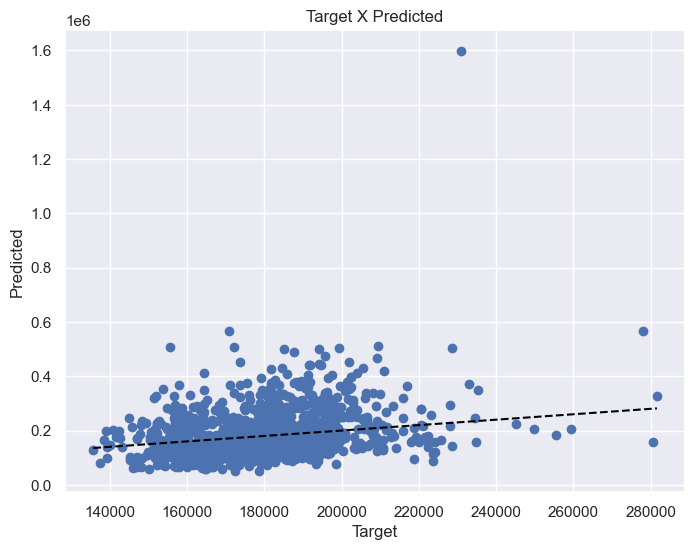

In [44]:
plt.scatter(target_test['SalePrice'], target_test['Predict_SalePrice'])
plt.plot([min(target_test['SalePrice']), max(target_test['SalePrice'])], [min(target_test['SalePrice']), max(target_test['SalePrice'])], '--', color='black')

plt.xlabel('Target')
plt.ylabel('Predicted')

plt.title('Target X Predicted')

plt.show()

In [45]:
residual = (target_test['SalePrice'] - target_test['Predict_SalePrice'])
residual

0       58342.697145
1       28159.557752
2        6648.651194
3      -14539.284337
4      -44905.485124
            ...     
1454    86507.562167
1455    76880.347440
1456    42615.365166
1457    64980.108858
1458   -28578.193821
Length: 1459, dtype: float64

In [46]:
res = stats.shapiro(residual)
res.statistic

0.7726585865020752

In [47]:
res.pvalue

6.098591046588036e-41

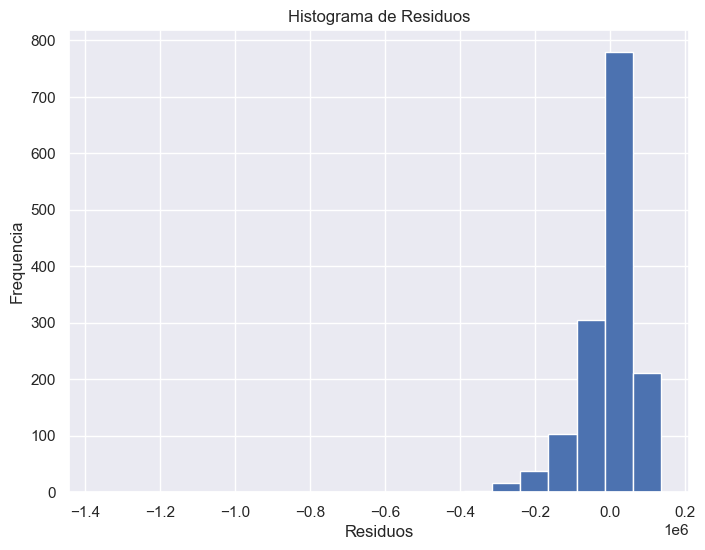

In [48]:
plt.hist(residual, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Histograma de Residuos")
plt.show()

In [49]:
rmse_pred = root_mean_squared_error(target_test['SalePrice'], target_test['Predict_SalePrice'])
rmse_pred

81623.25631100213

In [50]:
rmse_pred = root_mean_squared_error(np.log(target_test['SalePrice']), np.log(target_test['Predict_SalePrice']))
rmse_pred

0.3863049490585766